In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

# Visualization tools
import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [ ]:
mkdir mnist_train

In [ ]:
cd mnist_train

/content/mnist_train


In [ ]:
train_set = torchvision.datasets.MNIST("./data/", train=True, download=True)
valid_set = torchvision.datasets.MNIST("./data/", train=False, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.76MB/s]


In [ ]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train

In [ ]:
valid_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test

In [ ]:
x_0 , y_0 = train_set[2]

In [ ]:
x_0

In [ ]:
type(x_0)

PIL.Image.Image

In [ ]:
y_0

4

In [ ]:
type(y_0)

int

In [ ]:
from torchvision.transforms import v2

In [ ]:
trans = v2.Compose([
    v2.ToImage(),  # Görseli Image formatına dönüştürür
    v2.ToDtype(torch.float32, scale=True)  # float32'e dönüştürür ve [0, 1]'e normalleştirir
])
x_0_tensor = trans(x_0)

In [ ]:
x_0_tensor.dtype

torch.float32

In [ ]:
print(f"{x_0_tensor.min()} --------- {x_0_tensor.max()}")
x_0_tensor.min()

0.0 --------- 1.0


tensor(0.)

In [ ]:
x_0_tensor.size()

torch.Size([1, 28, 28])

In [ ]:
x_0_tensor

Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
x_0_tensor.device

device(type='cpu')

In [ ]:
x_0_gpu = x_0_tensor.cuda()
x_0_gpu.device

device(type='cuda', index=0)

In [ ]:
x_0_tensor.to(device).device

device(type='cuda', index=0)

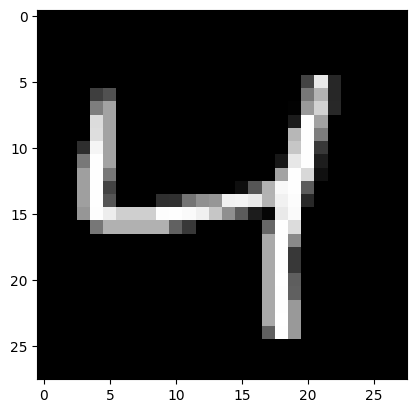

In [ ]:
image = F.to_pil_image(x_0_tensor)
plt.imshow(image, cmap='gray')

In [ ]:
train_set.transform = trans
valid_set.transform = trans

In [ ]:
batch_size = 32

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)

In [ ]:
layers = []
layers

[]

In [ ]:
test_matrix = torch.tensor([
    [[1,2,3],
     [4,5,6],
     [7,8,9]]
])
test_matrix

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
nn.Flatten()(test_matrix)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [ ]:
batch_test_matrix = test_matrix[None, :]
batch_test_matrix

tensor([[[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]])

In [ ]:
nn.Flatten()(batch_test_matrix)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [ ]:
nn.Flatten()(test_matrix[:, None])

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [ ]:
input_size = 1 * 28 * 28

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512), # input layer
    nn.ReLU(),
]

layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU()]

In [ ]:
input_size = 1 * 28 * 28

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512), # input layer
    nn.ReLU(), # activation for input
    nn.Linear(512, 512), # hidden layer
    nn.ReLU() # activation for hidden
]

layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU()]

In [ ]:
n_classes = 10
input_size = 1 * 28 * 28

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512), # input
    nn.ReLU(),
    nn.Linear(512, 512), # hidden
    nn.ReLU(),
    nn.Linear(512, n_classes) # output
]

layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True)]

In [ ]:
model = nn.Sequential(*layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
next(model.parameters()).device

device(type='cuda', index=0)

In [ ]:
model = torch.compile(model)

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())

## Accuracy

In [ ]:
train_N = len(train_loader.dataset)
valid_N = len(valid_loader.dataset)

In [ ]:
def get_batch_accuracy(output, y , N):
  pred = output.argmax(dim=1, keepdim=True)
  correct = pred.eq(y.view_as(pred)).sum().item()
  return correct / N

In [ ]:
def train():
  loss = 0
  accuracy = 0

  model.train()

  for x, y in train_loader:
    x, y = x.to(device), y.to(device)
    output = model(x)
    optimizer.zero_grad()
    batch_loss = loss_function(output , y)
    batch_loss.backward()
    optimizer.step()

    loss += batch_loss.item()

  accuracy += get_batch_accuracy(output, y, train_N)
  print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [ ]:
def validate():
  loss = 0
  accuracy = 0

  model.eval()

  with torch.no_grad():
    for x, y in valid_loader:
      x, y = x.to(device) , y.to(device)
      output = model(x)

      loss += loss_function(output, y).item()
      accuracy += get_batch_accuracy(output, y, valid_N)

  print("Valid - Loss: {:.4f} Accuracy:: {:.4f}".format(loss,accuracy))

In [ ]:
epochs = 10

for epoch in range(epochs):
  print("Epochs: {}".format(epoch))
  train()
  validate()

Epochs: 0
Train - Loss: 28.3883 Accuracy: 0.0005
Valid - Loss: 30.2168 Accuracy:: 0.9820
Epochs: 1
Train - Loss: 34.2695 Accuracy: 0.0005
Valid - Loss: 28.9467 Accuracy:: 0.9832
Epochs: 2
Train - Loss: 25.4376 Accuracy: 0.0005
Valid - Loss: 29.5173 Accuracy:: 0.9827
Epochs: 3
Train - Loss: 31.9806 Accuracy: 0.0005
Valid - Loss: 38.4441 Accuracy:: 0.9788
Epochs: 4
Train - Loss: 25.1068 Accuracy: 0.0005
Valid - Loss: 36.3544 Accuracy:: 0.9810
Epochs: 5
Train - Loss: 20.5309 Accuracy: 0.0005
Valid - Loss: 33.4351 Accuracy:: 0.9820
Epochs: 6
Train - Loss: 33.5241 Accuracy: 0.0005
Valid - Loss: 40.6516 Accuracy:: 0.9803
Epochs: 7
Train - Loss: 21.3217 Accuracy: 0.0005
Valid - Loss: 33.9819 Accuracy:: 0.9826
Epochs: 8
Train - Loss: 23.4360 Accuracy: 0.0005
Valid - Loss: 41.9562 Accuracy:: 0.9798
Epochs: 9
Train - Loss: 25.5970 Accuracy: 0.0005
Valid - Loss: 35.8512 Accuracy:: 0.9801


In [ ]:
prediction = model(x_0_gpu)
prediction

tensor([[-31.4839,  -0.3586, -14.1658, -32.1734,  16.1012, -24.3119, -32.7516,
         -36.0023, -18.5263,  -8.3623]], device='cuda:0',
       grad_fn=<CompiledFunctionBackward>)

In [ ]:
prediction.argmax(dim=1, keepdim=True)

tensor([[4]], device='cuda:0')

In [ ]:
y_0

4